# **Fruit Classification Using Logistic Regression & Decision Trees**

---


**Chean Botum ITE G8 A**

The data set is slightly permutated and is found here: https://raw.githubusercontent.com/lkyin/ECS189L/main/fruits.csv

Summary:

1. Built a logistic regression classifier to predict the fruit_name variable in terms of the predictors mass, width, height, and color_score.

2. Built a decision tree classifier to predict the fruit_name variable in terms of the predictors mass, width, height, and color_score.

3. Graphed the decision boundaries for the two models above and determined overall performances.


##  ***Loading the Data Set***

In [ ]:
import pandas as pd
# load the data
df = pd.read_csv('https://raw.githubusercontent.com/lkyin/ECS189L/main/fruits.csv', index_col=[0])

In [ ]:
# overview
df.head(10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,198.04,8.47,7.29,0.54
1,1,apple,granny_smith,169.98,7.84,6.41,0.59
2,1,apple,granny_smith,183.37,7.58,7.62,0.60
3,2,mandarin,mandarin,88.73,6.31,4.55,0.82
4,2,mandarin,mandarin,80.54,6.30,4.83,0.83
5,2,mandarin,mandarin,80.63,5.77,4.23,0.80
6,2,mandarin,mandarin,82.66,5.92,4.11,0.77
7,2,mandarin,mandarin,73.22,5.70,3.96,0.86
8,1,apple,braeburn,178.29,7.17,7.50,0.95
9,1,apple,braeburn,166.64,7.67,6.88,0.84


## ***Logistic Regression***


### Select the dependent variable, and independent variables of interest.

In [ ]:
# YOUR CODE
Y = df['fruit_name']
X = df[['mass','width','height','color_score']]
import scipy.stats as stats
X = stats.zscore(X)

### Split Training and Testing Using sklearn

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### Built Model with sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100000)
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)
print("Coefficients",model.coef_, '\n')
print("Intercepts", model.intercept_)

Coefficients [[ 0.46340731  2.26599839 -1.74351535  0.5320709 ]
 [-0.56017693 -2.06339502  4.40045488 -1.09770017]
 [-1.44534737 -0.74134227 -2.73700065  0.43260803]
 [ 1.54211699  0.5387389   0.08006113  0.13302123]] 

Intercepts [ 1.67558868 -0.55605004 -3.52791352  2.40837488]


### Summary of Best Model

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, Y_pred, output_dict = True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
apple,0.642857,0.658537,0.650602,41.000000
lemon,1.000000,1.000000,1.000000,31.000000
mandarin,1.000000,1.000000,1.000000,9.000000
orange,0.611111,0.594595,0.602740,37.000000
accuracy,0.754237,0.754237,0.754237,0.754237
macro avg,0.813492,0.813283,0.813336,118.000000
weighted avg,0.753968,0.754237,0.754034,118.000000


### Confusion Matrix

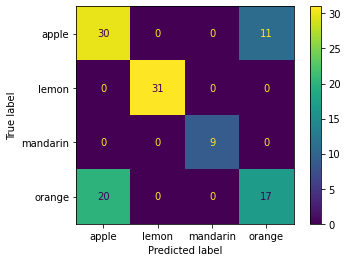

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegressionCV

clf = OneVsRestClassifier(LogisticRegressionCV())
y_score = clf.fit(X_train, Y_train).decision_function(X_test)

plot_confusion_matrix(clf, X_test, Y_test)

### ROC curve(s) and AUC value(s).

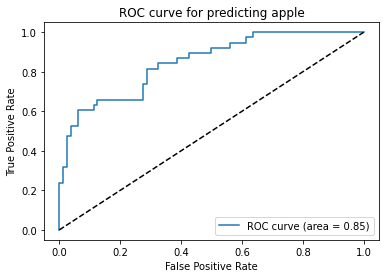

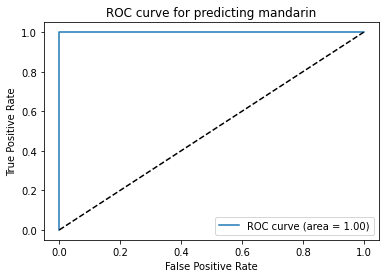

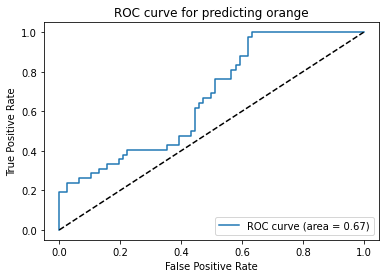

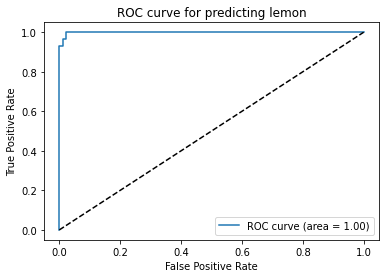

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

classes = Y.unique()
y = label_binarize(Y,classes=classes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clfLogistic = OneVsRestClassifier(LogisticRegressionCV(random_state=0))
y_score = clfLogistic.fit(X_train, y_train).decision_function(X_test)

fpr = {}
tpr = {}
roc_auc = {}
# interate through each class
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i, classname in enumerate(classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for predicting {}'.format(classname))
    plt.legend(loc="lower right")
    plt.show()

## ***Decision Tree***




In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.7)
clfDecision = DecisionTreeClassifier().fit(X_train, Y_train)

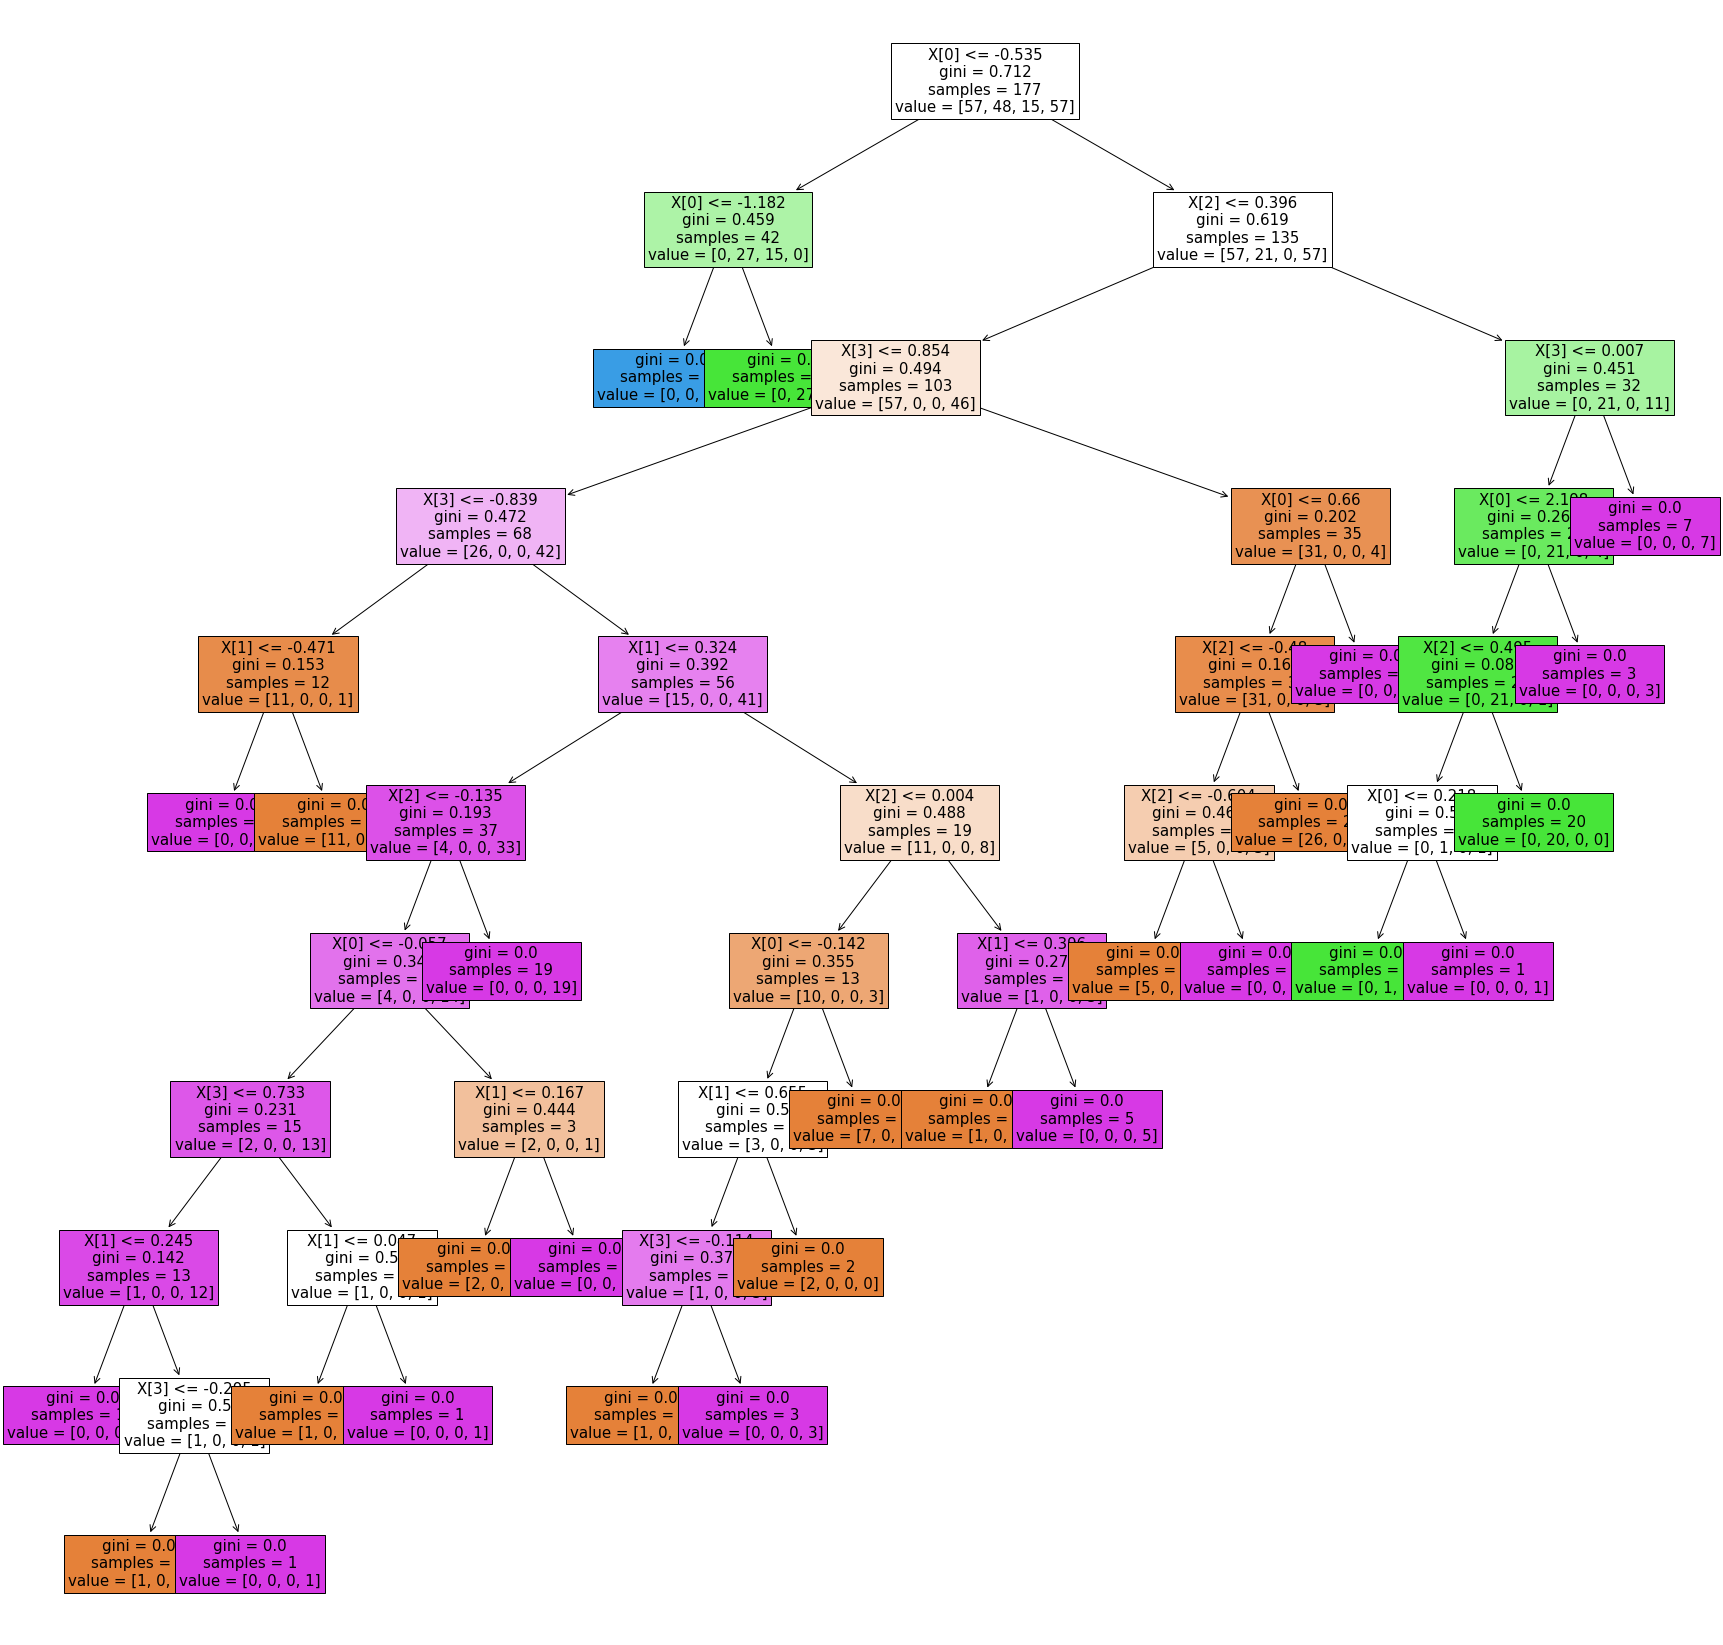

In [ ]:
%matplotlib inline
from sklearn.tree import plot_tree
plt.subplots(figsize=(30, 30))
plot_tree(clfDecision,filled=True, fontsize=15)
plt.show()

### Accuracy

In [ ]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}' .format(clfDecision.score(X_train, Y_train)))
print('Accuracy of Decision Tree classifier on testing set: {:.2f}'.format(clfDecision.score(X_test, Y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on testing set: 0.84


## ***Decision Boundaries***

### Logistic Regression Decision Boundaries

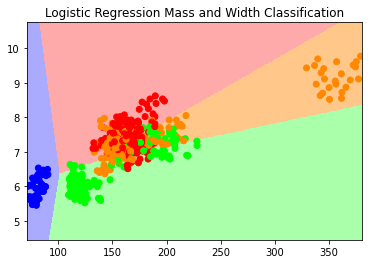

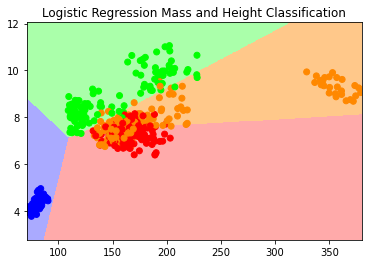

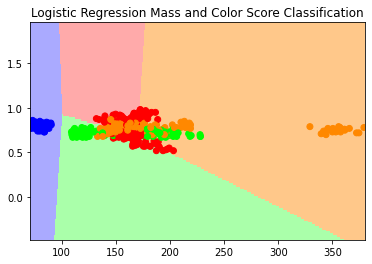

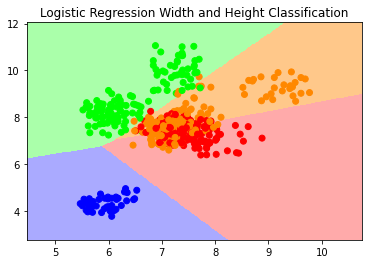

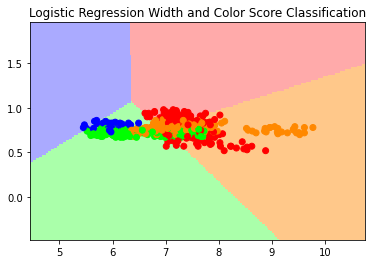

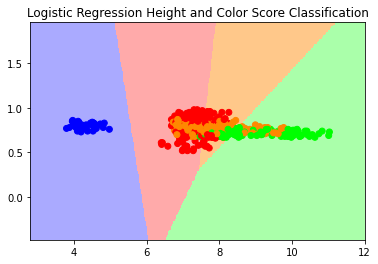

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegressionCV


Y = df['fruit_name']
y = Y.astype('category').cat.codes

X1 = df[['mass','width']].values
X2 = df[['mass','height']].values
X3 = df[['mass','color_score']].values
X4 = df[['width','height']].values
X5 = df[['width','color_score']].values
X6 = df[['height','color_score']].values

h = .02

def drawDecisionBoundariesLogistic(X,y,name1,name2):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  model = LogisticRegression(max_iter = 100000)
  model.fit(X_train, y_train)

  # Create color maps
  cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#FFC88A'])
  cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FF8800'])

  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
  y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  Z = model.predict((np.c_[xx.ravel(), yy.ravel()]))

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)

  # plotting
  plt.figure()
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

  # Plot also the training points
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.title("Logistic Regression {} and {} Classification".format(name1, name2))
  plt.show()

drawDecisionBoundariesLogistic(X1,y,'Mass','Width')
drawDecisionBoundariesLogistic(X2,y,'Mass','Height')
drawDecisionBoundariesLogistic(X3,y,'Mass','Color Score')
drawDecisionBoundariesLogistic(X4,y,'Width','Height')
drawDecisionBoundariesLogistic(X5,y,'Width','Color Score')
drawDecisionBoundariesLogistic(X6,y,'Height','Color Score')

### Decision Tree Decision Boundaries

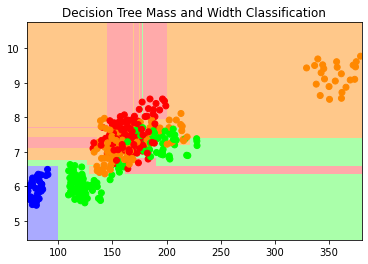

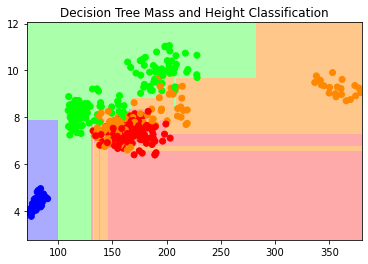

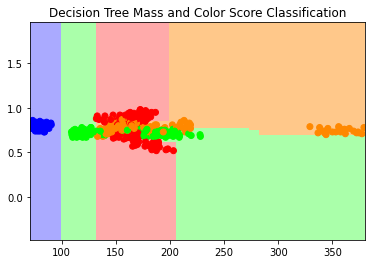

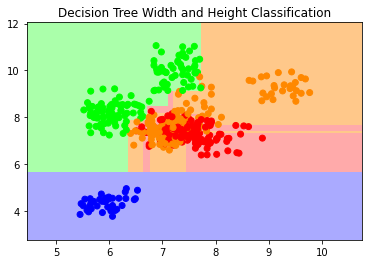

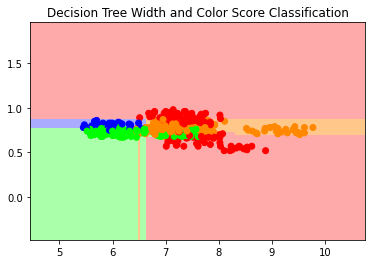

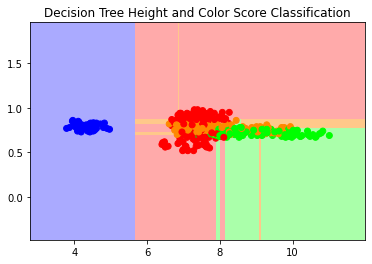

In [ ]:
def drawDecisionBoundariesDecisionTree(X,y,name1,name2):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  model = DecisionTreeClassifier()
  model.fit(X_train, y_train)

  # Create color maps
  cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#FFC88A'])
  cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FF8800'])

  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
  y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  Z = model.predict((np.c_[xx.ravel(), yy.ravel()]))

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)

  # plotting
  plt.figure()
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

  # Plot also the training points
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.title("Decision Tree {} and {} Classification".format(name1, name2))
  plt.show()

drawDecisionBoundariesDecisionTree(X1,y,'Mass','Width')
drawDecisionBoundariesDecisionTree(X2,y,'Mass','Height')
drawDecisionBoundariesDecisionTree(X3,y,'Mass','Color Score')
drawDecisionBoundariesDecisionTree(X4,y,'Width','Height')
drawDecisionBoundariesDecisionTree(X5,y,'Width','Color Score')
drawDecisionBoundariesDecisionTree(X6,y,'Height','Color Score')

## ***Results***

Mandarins and Lemons were most precise in the Logistic Regression summary, and the decision boundary does indeed reflect that.

The Decision Tree accuracy that was reported in #2 was high, and the decision boundaries displayed also reflect that quite well. Despite the abnormal boundaries, the colors stick to their respective regions better than in the Logistic Regression model.




